In [2]:
import os
import numpy as np
import pandas as pd

In [5]:
MRI_DIR = "/kaggle/input/mri-embeddings/kaggle/working/MRI_Embeddings"
classes = ["ADNI1_T1w_Cohort_AD_Visit_12_MRI", "ADNI1_T1w_DXMCI=1_at_m18_MRI", "ADNI1_T1w_Normal_at_m12_MRI"]

In [6]:
records = []

In [7]:
for cls in classes:
    cls_path = os.path.join(MRI_DIR, cls)
    for f in os.listdir(cls_path):
        if f.endswith(".npy"):
            subj_id = os.path.splitext(f)[0]
            emb = np.load(os.path.join(cls_path, f))
            records.append({"subject_id": subj_id, "label": cls, "embedding": emb})

In [8]:
mri_df = pd.DataFrame(records)

In [9]:
mri_df

,subject_id,label,embedding
0,027_S_1385_embedding,ADNI1_T1w_Cohort_AD_Visit_12_MRI,"[643.4721, 785.2202, 1101.3743, 541.1521, 616...."
1,053_S_1044_embedding,ADNI1_T1w_Cohort_AD_Visit_12_MRI,"[542.4037, 682.6201, 950.51624, 437.48688, 559..."
2,021_S_1109_embedding,ADNI1_T1w_Cohort_AD_Visit_12_MRI,"[379.79156, 500.94873, 670.08386, 289.28915, 3..."
3,021_S_0753_embedding,ADNI1_T1w_Cohort_AD_Visit_12_MRI,"[573.70636, 778.97107, 1051.7083, 462.75854, 6..."
4,007_S_1304_embedding,ADNI1_T1w_Cohort_AD_Visit_12_MRI,"[694.4516, 983.45056, 1221.8947, 570.5249, 682..."
...,...,...,...
578,012_S_1212_embedding,ADNI1_T1w_Normal_at_m12_MRI,"[150.85565, 218.46667, 272.623, 122.29109, 160..."
579,018_S_0369_embedding,ADNI1_T1w_Normal_at_m12_MRI,"[730.7479, 1074.0634, 1330.8406, 582.1516, 795..."
580,002_S_0685_embedding,ADNI1_T1w_Normal_at_m12_MRI,"[3281.9897, 4012.5044, 5679.92, 2558.7412, 307..."
581,033_S_0923_embedding,ADNI1_T1w_Normal_at_m12_MRI,"[687.7844, 879.311, 1227.3253, 553.43463, 697...."


In [10]:
print(mri_df.head())

             subject_id                             label  \
0  027_S_1385_embedding  ADNI1_T1w_Cohort_AD_Visit_12_MRI   
1  053_S_1044_embedding  ADNI1_T1w_Cohort_AD_Visit_12_MRI   
2  021_S_1109_embedding  ADNI1_T1w_Cohort_AD_Visit_12_MRI   
3  021_S_0753_embedding  ADNI1_T1w_Cohort_AD_Visit_12_MRI   
4  007_S_1304_embedding  ADNI1_T1w_Cohort_AD_Visit_12_MRI   

                                           embedding  
0  [643.4721, 785.2202, 1101.3743, 541.1521, 616....  
1  [542.4037, 682.6201, 950.51624, 437.48688, 559...  
2  [379.79156, 500.94873, 670.08386, 289.28915, 3...  
3  [573.70636, 778.97107, 1051.7083, 462.75854, 6...  
4  [694.4516, 983.45056, 1221.8947, 570.5249, 682...  


In [8]:
X_mri = np.stack([x.flatten() for x in mri_df['embedding']])
y = mri_df['label']
subjects = mri_df['subject_id']


In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

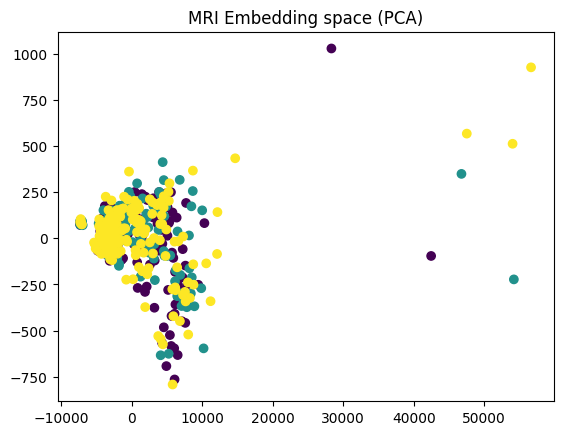

In [17]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_mri)
plt.scatter(X_2d[:,0], X_2d[:,1], c=pd.factorize(y)[0])
plt.title("MRI Embedding space (PCA)")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_mri, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
rf = RandomForestClassifier(n_estimators=600, random_state=42)

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600, random_state=42)

In [13]:
y_pred = rf.predict(X_test)

In [14]:
y_pred

array(['ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_Normal_at_m12_MRI',
       'ADNI1_T1w_DXMCI=1_at_m18_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_DXMCI=1_at_m18_MRI', 'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Normal_at_m12_MRI', 'ADNI1_T1w_Normal_at_m12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_DXMCI=1_at_m18_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_Normal_at_m12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_Normal_at_m12_MRI', 'ADNI1_T1w_DXMCI=1_at_m18_MRI',
       'ADNI1_T1w_Cohort_AD_Visit_12_MRI', 'ADNI1_T1w_No

In [15]:
print(" MRI-only accuracy:", accuracy_score(y_test, y_pred))

🧠 MRI-only accuracy: 0.28205128205128205


In [18]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

ADNI1_T1w_Cohort_AD_Visit_12_MRI       0.32      0.34      0.33        38
    ADNI1_T1w_DXMCI=1_at_m18_MRI       0.24      0.26      0.25        39
     ADNI1_T1w_Normal_at_m12_MRI       0.34      0.30      0.32        40

                        accuracy                           0.30       117
                       macro avg       0.30      0.30      0.30       117
                    weighted avg       0.30      0.30      0.30       117



In [33]:
genetic_df = pd.read_csv("/kaggle/input/genotype-embeddings/genotype_embeddings_64_EDdyg.csv")
print(genetic_df.head())

  subject_id    g_emb_1   g_emb_2   g_emb_3   g_emb_4   g_emb_5   g_emb_6  \
0  014_S_0520 -0.578734  3.132965 -1.761292  2.430625  2.928332  3.931489   
1  005_S_1341 -0.563445  2.929773 -1.612141  2.196013  2.673989  3.589893   
2  012_S_1175 -0.626003  3.018895 -1.662368  2.258130  2.841830  3.822082   
3  012_S_0803 -0.477761  2.915974 -1.640059  2.261017  2.648298  3.518718   
4  018_S_0055 -0.446255  2.870655 -1.576872  2.246558  2.517003  3.357546   

    g_emb_7   g_emb_8   g_emb_9  ...  g_emb_55  g_emb_56  g_emb_57  g_emb_58  \
0 -2.211698  0.088387 -0.410398  ...  1.933336 -2.204440  0.417111 -2.678214   
1 -1.901761  0.078646 -0.432151  ...  1.864151 -1.994817  0.393981 -2.421541   
2 -2.077883  0.076478 -0.366776  ...  1.848483 -2.070744  0.363167 -2.579698   
3 -1.883063  0.069738 -0.490248  ...  1.927863 -2.017476  0.459499 -2.384966   
4 -1.869893  0.090026 -0.456983  ...  1.945394 -1.971201  0.413017 -2.356363   

   g_emb_59  g_emb_60  g_emb_61  g_emb_62  g_emb_63  g_e

In [34]:
genetic_df

,subject_id,g_emb_1,g_emb_2,g_emb_3,g_emb_4,g_emb_5,g_emb_6,g_emb_7,g_emb_8,g_emb_9,...,g_emb_55,g_emb_56,g_emb_57,g_emb_58,g_emb_59,g_emb_60,g_emb_61,g_emb_62,g_emb_63,g_emb_64
0,014_S_0520,-0.578734,3.132965,-1.761292,2.430625,2.928332,3.931489,-2.211698,0.088387,-0.410398,...,1.933336,-2.204440,0.417111,-2.678214,-1.633901,-0.028996,1.054391,0.573793,-1.052879,-1.242042
1,005_S_1341,-0.563445,2.929773,-1.612141,2.196013,2.673989,3.589893,-1.901761,0.078646,-0.432151,...,1.864151,-1.994817,0.393981,-2.421541,-1.522653,-0.074178,1.008488,0.449152,-0.870114,-1.157457
2,012_S_1175,-0.626003,3.018895,-1.662368,2.258130,2.841830,3.822082,-2.077883,0.076478,-0.366776,...,1.848483,-2.070744,0.363167,-2.579698,-1.561931,-0.046776,0.971768,0.520422,-1.030571,-1.234561
3,012_S_0803,-0.477761,2.915974,-1.640059,2.261017,2.648298,3.518718,-1.883063,0.069738,-0.490248,...,1.927863,-2.017476,0.459499,-2.384966,-1.536911,-0.072636,1.081803,0.449155,-0.764651,-1.120286
4,018_S_0055,-0.446255,2.870655,-1.576872,2.246558,2.517003,3.357546,-1.869893,0.090026,-0.456983,...,1.945394,-1.971201,0.413017,-2.356363,-1.496915,-0.021568,1.076046,0.448106,-0.767755,-1.009130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,031_S_0867,-0.520479,3.036029,-1.677358,2.393949,2.781230,3.699427,-1.982086,0.047179,-0.455042,...,1.935221,-2.025827,0.454534,-2.425557,-1.581069,-0.058518,1.110382,0.506281,-0.782253,-1.188383
581,057_S_0934,-0.484467,3.027931,-1.680023,2.368432,2.691276,3.607758,-2.047886,0.103341,-0.478161,...,1.967929,-2.117809,0.445907,-2.557186,-1.580006,-0.010307,1.119784,0.509139,-0.899911,-1.091910
582,141_S_1052,-0.420742,3.030097,-1.684619,2.509381,2.732466,3.612558,-1.944790,0.061370,-0.464399,...,1.979868,-1.986052,0.480782,-2.285931,-1.606412,-0.001023,1.184447,0.524869,-0.686604,-1.114684
583,129_S_0778,-0.624170,3.146880,-1.706461,2.407172,3.031873,4.057936,-1.995730,0.063753,-0.366631,...,1.877528,-1.948856,0.433330,-2.404032,-1.636666,-0.054805,1.036643,0.540642,-0.818952,-1.360464


In [35]:
print(mri_df.columns)
print(genetic_df.columns)

Index(['subject_id', 'label', 'embedding'], dtype='object')
Index(['subject_id ', 'g_emb_1', 'g_emb_2', 'g_emb_3', 'g_emb_4', 'g_emb_5',
       'g_emb_6', 'g_emb_7', 'g_emb_8', 'g_emb_9', 'g_emb_10', 'g_emb_11',
       'g_emb_12', 'g_emb_13', 'g_emb_14', 'g_emb_15', 'g_emb_16', 'g_emb_17',
       'g_emb_18', 'g_emb_19', 'g_emb_20', 'g_emb_21', 'g_emb_22', 'g_emb_23',
       'g_emb_24', 'g_emb_25', 'g_emb_26', 'g_emb_27', 'g_emb_28', 'g_emb_29',
       'g_emb_30', 'g_emb_31', 'g_emb_32', 'g_emb_33', 'g_emb_34', 'g_emb_35',
       'g_emb_36', 'g_emb_37', 'g_emb_38', 'g_emb_39', 'g_emb_40', 'g_emb_41',
       'g_emb_42', 'g_emb_43', 'g_emb_44', 'g_emb_45', 'g_emb_46', 'g_emb_47',
       'g_emb_48', 'g_emb_49', 'g_emb_50', 'g_emb_51', 'g_emb_52', 'g_emb_53',
       'g_emb_54', 'g_emb_55', 'g_emb_56', 'g_emb_57', 'g_emb_58', 'g_emb_59',
       'g_emb_60', 'g_emb_61', 'g_emb_62', 'g_emb_63', 'g_emb_64'],
      dtype='object')


In [36]:
genetic_df.columns = genetic_df.columns.str.strip().str.lower()

In [24]:
merged_df = pd.merge(
    mri_df.drop(columns=['embedding']), 
    genetic_df, 
    on='subject_id'
)

In [25]:
merged_df

,subject_id,label,g_emb_1,g_emb_2,g_emb_3,g_emb_4,g_emb_5,g_emb_6,g_emb_7,g_emb_8,...,g_emb_55,g_emb_56,g_emb_57,g_emb_58,g_emb_59,g_emb_60,g_emb_61,g_emb_62,g_emb_63,g_emb_64


In [26]:
# Re-align embeddings
mri_emb_dict = {row.subject_id: row.embedding.flatten() for _, row in mri_df.iterrows()}
X_mri_fused = []
X_genetic = []

In [27]:
for sid in merged_df['subject_id']:
    X_mri_fused.append(mri_emb_dict[sid])
    X_genetic.append(genetic_df[genetic_df.subject_id == sid].drop(columns=['subject_id']).values.squeeze())

In [28]:
X_mri_fused = np.array(X_mri_fused)
X_genetic = np.array(X_genetic)

In [31]:
X_mri_fused

array([], dtype=float64)

In [32]:
X_fused = np.concatenate([X_mri_fused, X_genetic], axis=1)
y_fused = merged_df['label']

AxisError: axis 1 is out of bounds for array of dimension 1

In [37]:
import numpy as np
import pandas as pd

# Assuming mri_df and genetic_df already loaded

# --- Clean subject_id for proper merging ---
mri_df['subject_id'] = mri_df['subject_id'].str.replace('_embedding', '', regex=False)

# --- Merge on subject_id ---
merged_df = pd.merge(mri_df, genetic_df, on='subject_id', how='inner')

# --- Extract MRI embeddings properly ---
# mri_df['embedding'] is a list of floats → turn into np array
X_mri = np.stack(merged_df['embedding'].apply(np.array))

# --- Extract genetic embeddings ---
X_genetic = merged_df.loc[:, merged_df.columns.str.startswith('g_emb_')].values

# --- Fuse them ---
X_fused = np.concatenate([X_mri, X_genetic], axis=1)

# --- Labels ---
y_fused = merged_df['label']


In [38]:
X_fused

array([[ 6.43472107e+02,  7.85220215e+02,  1.10137427e+03, ...,
         4.73170760e-01, -1.06068310e+00, -1.39535500e+00],
       [ 5.42403687e+02,  6.82620117e+02,  9.50516235e+02, ...,
         4.86348500e-01, -9.17094950e-01, -1.09966670e+00],
       [ 3.79791565e+02,  5.00948730e+02,  6.70083862e+02, ...,
         6.91467100e-01, -1.12808040e+00, -1.32253970e+00],
       ...,
       [ 3.28198975e+03,  4.01250439e+03,  5.67991992e+03, ...,
         4.53768250e-01, -8.06313000e-01, -9.77709100e-01],
       [ 6.87784424e+02,  8.79310974e+02,  1.22732532e+03, ...,
         5.07278860e-01, -9.76939400e-01, -1.14731360e+00],
       [ 7.65755981e+02,  9.23335205e+02,  1.33196826e+03, ...,
         4.98959360e-01, -1.19332160e+00, -1.22065010e+00]])

In [39]:
y_fused 

0      ADNI1_T1w_Cohort_AD_Visit_12_MRI
1      ADNI1_T1w_Cohort_AD_Visit_12_MRI
2      ADNI1_T1w_Cohort_AD_Visit_12_MRI
3      ADNI1_T1w_Cohort_AD_Visit_12_MRI
4      ADNI1_T1w_Cohort_AD_Visit_12_MRI
                     ...               
578         ADNI1_T1w_Normal_at_m12_MRI
579         ADNI1_T1w_Normal_at_m12_MRI
580         ADNI1_T1w_Normal_at_m12_MRI
581         ADNI1_T1w_Normal_at_m12_MRI
582         ADNI1_T1w_Normal_at_m12_MRI
Name: label, Length: 583, dtype: object

In [41]:
print(X_mri.shape, X_genetic.shape, X_fused.shape)
print(len(y_fused))
print(len(X_fused))

(583, 512) (583, 64) (583, 576)
583
583


In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_fused)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fused, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    random_state=42,
    class_weight='balanced', 
    n_jobs=-1
)

In [52]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=400, n_jobs=-1,
                       random_state=42)

In [53]:
y_pred = rf_model.predict(X_test_scaled)

In [56]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


✅ Accuracy: 0.26495726495726496

Classification Report:
                                   precision    recall  f1-score   support

ADNI1_T1w_Cohort_AD_Visit_12_MRI       0.30      0.29      0.29        38
    ADNI1_T1w_DXMCI=1_at_m18_MRI       0.25      0.33      0.28        39
     ADNI1_T1w_Normal_at_m12_MRI       0.26      0.17      0.21        40

                        accuracy                           0.26       117
                       macro avg       0.27      0.27      0.26       117
                    weighted avg       0.27      0.26      0.26       117

